# Newton and Quasi-Newton methods

In [48]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
from scipy import linalg as la
from scipy import optimize as opt
from autograd.numpy.linalg import solve, norm
from autograd import grad, jacobian

## Problem 1

In [10]:
def problem1():
    
    x = sy.symbols('x')
    f = ( sy.sin(x) + 1 )**( sy.sin(sy.cos(x)) )
    dfdx = sy.diff(f, x)
    lam_dfdx = sy.utilities.lambdify(x, dfdx)
    lam_f = sy.utilities.lambdify(x, f)
    
    return lam_f, lam_dfdx

In [11]:
f, dfdx = problem1()

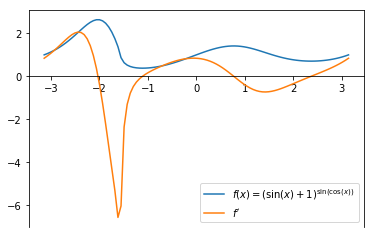

In [12]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
domain = np.linspace(-np.pi, np.pi, 100)
ax.plot(domain, f(domain), label=r'$f(x) = (\sin(x) + 1)^{\sin(\cos(x))}$')
ax.plot(domain, dfdx(domain), label=r'$f^{\prime}$')
plt.legend()
plt.show()

## Problem 2

In [13]:
def forward_o1(f, x, h): 
    num = f(x+h) - f(x)
    den = h
    return num / den

def forward_o2(f, x, h):
    num = -3*f(x) + 4*f(x + h) - f(x + 2*h)
    den = 2*h
    return num / den

def backward_o1(f, x, h):
    num = f(x) - f(x - h) 
    den = h
    return num / den

def backward_o2(f, x, h):
    num = 3*f(x) - 4*f(x - h) + f(x - 2*h)
    den = 2*h
    return num / den

def centered_o2(f, x, h):
    num = f(x + h) - f(x - h)
    den = 2*h
    return num / den

def centered_o4(f, x, h):
    num = f(x - 2*h) - 8*f(x - h) + 8*f(x + h) - f(x + 2*h)
    den = 12*h
    return num / den

In [14]:
def test_func(x):
    return (np.sin(x) + 1)**np.sin(np.cos(x))

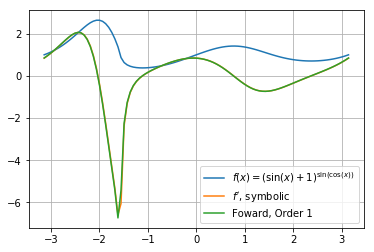

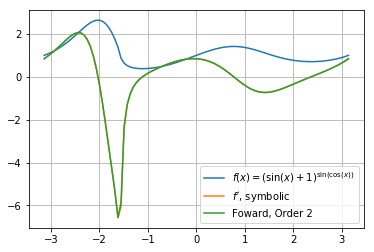

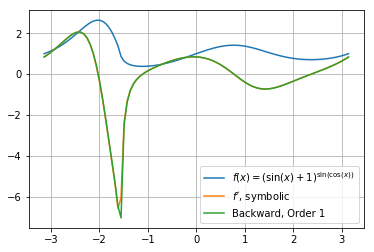

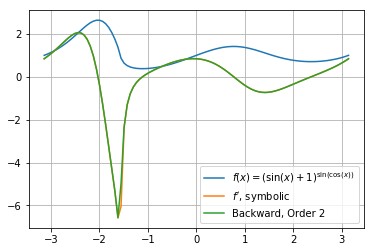

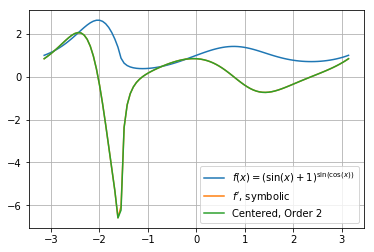

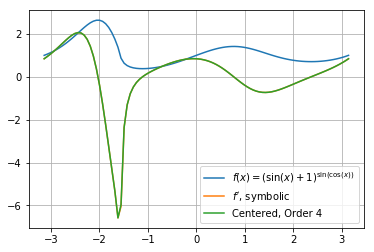

In [26]:
#fig, ax = plt.subplots(3, 2, figsize=(15, 7))
h = 1e-2

def plot_this(f, symdf, df, domain, h, label):
    domain = np.linspace(-np.pi, np.pi, 100)
    plt.plot(domain, f(domain), label=r'$f(x) = (\sin(x) + 1)^{\sin(\cos(x))}$')
    plt.plot(domain, symdf(domain), label=r'$f^{\prime}$, symbolic')
    plt.plot(domain, df(test_func, domain, h), label=label)
    plt.grid()
    plt.legend()
    plt.show()

plot_this(f, df, forward_o1, domain, h, 'Foward, Order 1')  
plot_this(f, df, forward_o2, domain, h, 'Foward, Order 2')   
plot_this(f, df, backward_o1, domain, h, 'Backward, Order 1')   
plot_this(f, df, backward_o2, domain, h, 'Backward, Order 2')   
plot_this(f, df, centered_o2, domain, h, 'Centered, Order 2')   
plot_this(f, df, centered_o4, domain, h, 'Centered, Order 4')   

In [35]:
print('L_inf norm of the difference between symbolic and numeric derivative for forward order 1: ', np.linalg.norm(df(domain) - forward_o1(test_func, domain, h), np.inf))
print('')
print('L_inf norm difference symbolic and numeric derivative for forward order 2: ', np.linalg.norm(df(domain) - forward_o2(test_func, domain, h), np.inf))
print('')
print('L_inf norm difference symbolic and numeric derivative for backward order 1: ', np.linalg.norm(df(domain) - backward_o1(test_func, domain, h), np.inf))
print('')
print('L_inf norm difference symbolic and numeric derivative for backward order 2: ', np.linalg.norm(df(domain) - backward_o2(test_func, domain, h), np.inf))
print('')
print('L_inf norm difference symbolic and numeric derivative for centered order 2: ', np.linalg.norm(df(domain) - centered_o2(test_func, domain, h), np.inf))
print('')
print('L_inf norm difference symbolic and numeric derivative for centered order 4: ', np.linalg.norm(df(domain) - centered_o4(test_func, domain, h), np.inf))


L_inf norm of the difference between symbolic and numeric derivative for forward order 1:  0.635827204659754

L_inf norm difference symbolic and numeric derivative for forward order 2:  0.16179982291453587

L_inf norm difference symbolic and numeric derivative for backward order 1:  0.9944925651820276

L_inf norm difference symbolic and numeric derivative for backward order 2:  1.0699878136016459

L_inf norm difference symbolic and numeric derivative for centered order 2:  0.1793326802611368

L_inf norm difference symbolic and numeric derivative for centered order 4:  0.08574281924527405


## Problem 3

In [36]:
h = np.logspace(-8, 1, num=10)
fo1 = np.zeros(len(h), dtype=np.float64)
fo2 = np.zeros(len(h), dtype=np.float64)
bo1 = np.zeros(len(h), dtype=np.float64)
bo2 = np.zeros(len(h), dtype=np.float64)
co2 = np.zeros(len(h), dtype=np.float64)
co4 = np.zeros(len(h), dtype=np.float64)

In [37]:
f, dfdx = problem1()
domain = 1

In [38]:
for index, hlevel in enumerate(h):
    fo1[index] = np.abs(dfdx(domain) - forward_o1(test_func, domain, hlevel))
    fo2[index] = np.abs(dfdx(domain) - forward_o2(test_func, domain, hlevel))
    bo1[index] = np.abs(dfdx(domain) - backward_o1(test_func, domain, hlevel))
    bo2[index] = np.abs(dfdx(domain) - backward_o2(test_func, domain, hlevel))
    co2[index] = np.abs(dfdx(domain) - centered_o2(test_func, domain, hlevel))
    co4[index] = np.abs(dfdx(domain) - centered_o4(test_func, domain, hlevel))

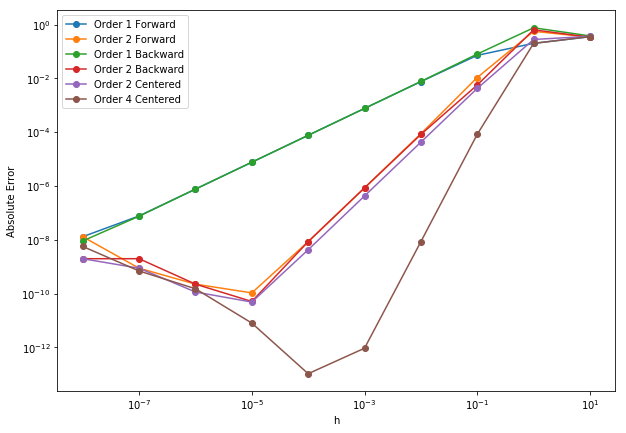

In [39]:
fig = plt.figure(figsize=(10,7))
plt.loglog()
plt.plot(h, fo1, '-o', label='Order 1 Forward')
plt.plot(h, fo2, '-o', label='Order 2 Forward')
plt.plot(h, bo1, '-o', label='Order 1 Backward')
plt.plot(h, bo2, '-o', label='Order 2 Backward')
plt.plot(h, co2, '-o', label='Order 2 Centered')
plt.plot(h, co4, '-o', label='Order 4 Centered')
plt.legend()
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.show()

## Problem 5

In [42]:
def numericJacobian(f, x, h):
    n = np.shape(x)[0]
    m = np.shape(f(x))[0]
    
    jacobian = np.zeros((m,n))
    for i in range(n):
        eii = np.eye(n)[:,i]
        jacobian[:, i] = (f(x + h * eii) - f(x - h * eii)) / (2 * h)
    return jacobian

In [43]:
f = lambda x: np.array([x[0] ** 2, x[0] ** 3 - x[1]])
numericJacobian(f, np.array([0, 0]), 1e-4)

array([[ 0.e+00,  0.e+00],
       [ 1.e-08, -1.e+00]])

In [44]:
x, y = sy.symbols('x, y')
f1 = x ** 2
f2 = x ** 3 - y
F = sy.Matrix([f1,f2])  
F.jacobian([x,y])

Matrix([
[   2*x,  0],
[3*x**2, -1]])

In [45]:
F.jacobian([x,y]).subs([(x,0), (y,0)])

Matrix([
[0,  0],
[0, -1]])

In [55]:
import time
from autograd import grad

def exp(N):
    
    func = lambda x: (anp.sin(x) + 1) ** (anp.sin(anp.cos(x)))
    time_sym = np.zeros(N, dtype=np.float64)
    time_autograd = np.zeros(N, dtype=np.float64)
    time_centered = np.zeros(N, dtype=np.float64)
    
    err_centered = np.zeros(N, dtype=np.float64)
    err_autograd = np.zeros(N, dtype=np.float64)

    
    for i in range(N):
        # Choose a random value x0
        x0 = np.random.rand()
        
        # Use function from Problem 1 to calculate the “exact” value of f prime
        time_start_exact = time.time()
        f, df = problem_1()
        time_sym[i] =  time.time() - time_start_exact
        
        # Time approximation of fprime using fourth-rder centered difference quotient
        time_start_centered = time.time()
        err_centered[i] = np.abs(centered_o4(func, x0, 1e-4) - df(x0))
        time_centered[i] =  time.time() - time_start_centered
        
        #Time approximation of fprime using Autograd
        dfgrad = grad(func)
        time_start_autograd = time.time()
        err_autograd[i] = np.abs(dfgrad(x0) - df(x0))
        time_autograd[i] = time.time() - time_start_autograd
            
    # Create plot of time vs error
    fig = plt.figure(figsize=(10, 7))
    # Plot errors
    plt.scatter(time_sym, 1e-18 * np.ones(N), alpha=0.5, label='Exact, SymPy', s=30)
    plt.scatter(time_centered, err_centered, alpha=0.5, label='Centered Difference', s=30)
    plt.scatter(time_autograd, err_autograd, alpha=0.5, label='Autograd', s=30)
    # Settings
    plt.loglog()
    plt.xlim(1e-5, 1e-1)
    plt.ylim(1e-19, 1e-11)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Absolute Error')
    plt.legend()
    plt.show()

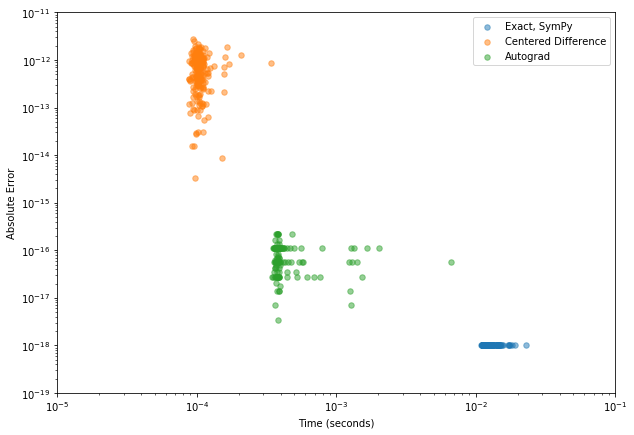

In [56]:
exp(200)